### This notebook is used to process the big riblet runs, consolidate all the data/graphs into one notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import string

In [2]:
def collate_all_dataframes(results_directory, delta_t, t_max):
    '''
    for the alpha over time data, need to collate all the individual dataframes into one master one
    '''
    
    t_vals = np.arange(delta_t, t_max+delta_t, delta_t)
    dataframe_list = [] #empty list to store dataframes
    #print(t_vals.size)
    for i in range(t_vals.size):
        t_string = "{:.1f}".format(t_vals[i])
        
        df = pd.read_csv(results_directory+"alpha_data-t="+t_string+".csv")
        df['t'] = t_vals[i]
        dataframe_list.append(df)
        
    master_dataframe = pd.concat(dataframe_list ,ignore_index=True) #collate all the individual dataframes together
    master_dataframe['alpha_normalised'] = master_dataframe['alpha.biofilm']/np.amax(master_dataframe['alpha.biofilm'])
    #master_dataframe['sd'] = 2
    return master_dataframe

In [3]:
delta_t = 0.2 #timestep of sampled data
t_max = 20.

In [4]:
parallelFlow_NOBIOFILM_drag = pd.read_csv("riblet_data/integral_results_parallel_NOBIOFILM/drag_over_time.csv").rename(columns=lambda x: x.strip())
parallelFlow_14microns_drag = pd.read_csv("riblet_data/integral_results_parallel_14microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
parallelFlow_28microns_drag = pd.read_csv("riblet_data/integral_results_parallel_28microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
parallelFlow_50microns_drag = pd.read_csv("riblet_data/integral_results_parallel_50microns/drag_over_time.csv").rename(columns=lambda x: x.strip())

angle45Flow_NOBIOFILM_drag = pd.read_csv("riblet_data/integral_results_45deg_NOBIOFILM/drag_over_time.csv").rename(columns=lambda x: x.strip())
angle45Flow_14microns_drag = pd.read_csv("riblet_data/integral_results_45deg_14microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
angle45Flow_28microns_drag = pd.read_csv("riblet_data/integral_results_45deg_28microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
angle45Flow_50microns_drag = pd.read_csv("riblet_data/integral_results_45deg_50microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
#use the magnitude of the total force to work out the drag
angle45Flow_NOBIOFILM_drag['F_total'] = np.sqrt(angle45Flow_NOBIOFILM_drag['F_x']**2 + angle45Flow_NOBIOFILM_drag['F_z']**2)
angle45Flow_14microns_drag['F_total'] = np.sqrt(angle45Flow_14microns_drag['F_x']**2 + angle45Flow_14microns_drag['F_z']**2)
angle45Flow_28microns_drag['F_total'] = np.sqrt(angle45Flow_28microns_drag['F_x']**2 + angle45Flow_28microns_drag['F_z']**2)
angle45Flow_50microns_drag['F_total'] = np.sqrt(angle45Flow_50microns_drag['F_x']**2 + angle45Flow_50microns_drag['F_z']**2)

perpendicularFlow_NOBIOFILM_drag = pd.read_csv("riblet_data/integral_results_perpendicular_NOBIOFILM/drag_over_time.csv").rename(columns=lambda x: x.strip())
perpendicularFlow_14microns_drag = pd.read_csv("riblet_data/integral_results_perpendicular_14microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
perpendicularFlow_28microns_drag = pd.read_csv("riblet_data/integral_results_perpendicular_28microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
perpendicularFlow_50microns_drag = pd.read_csv("riblet_data/integral_results_perpendicular_50microns/drag_over_time.csv").rename(columns=lambda x: x.strip())

#these are the perpendicular flow simulations which were run for an additional 10 seconds
#the first 20 seconds of these are identical to the old ones, so we can delete the non-EXTRA data.
#(we can keep the processed data in the riblet_data directory, but delete the big openfoam case directories in PhD/openfoam_results)
perpendicularFlow_14microns_drag_EXTRA = pd.read_csv("riblet_data/integral_results_perpendicular_14microns_EXTRA/drag_over_time.csv").rename(columns=lambda x: x.strip())
perpendicularFlow_28microns_drag_EXTRA = pd.read_csv("riblet_data/integral_results_perpendicular_28microns_EXTRA/drag_over_time.csv").rename(columns=lambda x: x.strip())
perpendicularFlow_50microns_drag_EXTRA = pd.read_csv("riblet_data/integral_results_perpendicular_50microns_EXTRA/drag_over_time.csv").rename(columns=lambda x: x.strip())

In [5]:
#the values for the drag on the system without biofilm
parallelFlow_NOBIOFILM_drag_value = parallelFlow_NOBIOFILM_drag['F_z'].values[-1]
angle45Flow_NOBIOFILM_drag_value = angle45Flow_NOBIOFILM_drag['F_total'].values[-1]
perpendicularFlow_NOBIOFILM_drag_value = perpendicularFlow_NOBIOFILM_drag['F_x'].values[-1]

NOBIOFILM_drag_vals = [parallelFlow_NOBIOFILM_drag_value, angle45Flow_NOBIOFILM_drag_value, perpendicularFlow_NOBIOFILM_drag_value]

In [6]:
bf_thickness_labels = ["14 $\mu$m", "28 $\mu$m", "50 $\mu$m"]
drag_angle_labels = ["$0^\degree$", "$45^\degree$", "$90^\degree$"]
thickness_colours = ['#5c00e6', '#e67300', '#009933']
parallelDrag_key = "F_z"
angle45Drag_key = "F_total"
perpendicularDrag_key = "F_x"

In [7]:
#group the drag dataframes together by flow direction
#each entry is a tuple containing the dataframe and the key needed for the relevant drag entry
dragDataframes_parallelFlow = [(parallelFlow_14microns_drag, parallelDrag_key), (parallelFlow_28microns_drag, parallelDrag_key), (parallelFlow_50microns_drag, parallelDrag_key)]
dragDataframes_angle45Flow = [(angle45Flow_14microns_drag, angle45Drag_key), (angle45Flow_28microns_drag, angle45Drag_key), (angle45Flow_50microns_drag, angle45Drag_key)]
dragDataframes_perpendicularFlow = [(perpendicularFlow_14microns_drag, perpendicularDrag_key), (perpendicularFlow_28microns_drag, perpendicularDrag_key), (perpendicularFlow_50microns_drag, perpendicularDrag_key)]
#dragDataframes_perpendicularFlow_EXTRA = [(perpendicularFlow_14microns_drag_EXTRA, perpendicularDrag_key), (perpendicularFlow_28microns_drag, perpendicularDrag_key), (perpendicularFlow_50microns_drag, perpendicularDrag_key)]

#group the drag dataframes together by biofilm thickness
#each entry is a tuple containing the dataframe and the key needed for the relevant drag entry
dragDataFrames_14microns = [(parallelFlow_14microns_drag, parallelDrag_key), (angle45Flow_14microns_drag, angle45Drag_key), (perpendicularFlow_14microns_drag, perpendicularDrag_key)]
dragDataFrames_28microns = [(parallelFlow_28microns_drag, parallelDrag_key), (angle45Flow_28microns_drag, angle45Drag_key), (perpendicularFlow_28microns_drag, perpendicularDrag_key)]
dragDataFrames_50microns = [(parallelFlow_50microns_drag, parallelDrag_key), (angle45Flow_50microns_drag, angle45Drag_key), (perpendicularFlow_50microns_drag, perpendicularDrag_key)]

In [8]:
parallelFlow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_parallel_14microns/", delta_t, t_max)
parallelFlow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_parallel_28microns/", delta_t, t_max)
parallelFlow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_parallel_50microns/", delta_t, t_max)

angle45Flow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_14microns/", delta_t, t_max)
angle45Flow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_28microns/", delta_t, t_max)
angle45Flow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_50microns/", delta_t, t_max)

perpendicularFlow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular_14microns/", delta_t, t_max)
perpendicularFlow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular_28microns/", delta_t, t_max)
perpendicularFlow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular_50microns/", delta_t, t_max)

perpendicularFlow_14microns_alpha_EXTRA = collate_all_dataframes("riblet_data/alpha_data_perpendicular_14microns_EXTRA/", delta_t, t_max=30.)
perpendicularFlow_28microns_alpha_EXTRA = collate_all_dataframes("riblet_data/alpha_data_perpendicular_28microns_EXTRA/", delta_t, t_max=30.)
perpendicularFlow_50microns_alpha_EXTRA = collate_all_dataframes("riblet_data/alpha_data_perpendicular_50microns_EXTRA/", delta_t, t_max=30.)
#parallelFlow_14microns_alpha

In [9]:
#group the biofilm dataframes together by flow direction
alphaDataframes_parallelFlow = [parallelFlow_14microns_alpha, parallelFlow_28microns_alpha, parallelFlow_50microns_alpha]
alphaDataframes_angle45Flow = [angle45Flow_14microns_alpha, angle45Flow_28microns_alpha, angle45Flow_50microns_alpha]
alphaDataframes_perpendicularFlow = [perpendicularFlow_14microns_alpha, perpendicularFlow_28microns_alpha, perpendicularFlow_50microns_alpha]
alphaDataframes_perpendicularFlow_EXTRA = [perpendicularFlow_14microns_alpha_EXTRA, perpendicularFlow_28microns_alpha_EXTRA, perpendicularFlow_50microns_alpha_EXTRA]

#group the biofilm dataframes together by biofilm thickness
alphaDataFrames_14microns = [parallelFlow_14microns_alpha, angle45Flow_14microns_alpha, perpendicularFlow_14microns_alpha]
alphaDataFrames_28microns = [parallelFlow_28microns_alpha, angle45Flow_28microns_alpha, perpendicularFlow_28microns_alpha]
alphaDataFrames_50microns = [parallelFlow_50microns_alpha, angle45Flow_50microns_alpha, perpendicularFlow_50microns_alpha]

In [45]:
def plot3x1DragcomparisonPlots(df_group1, df_group2, df_group3, baseline_vals, label_list, title_list, filename):
    '''
    makes a 3x1 subplot plot. each subplot contains 3 lines, with a different variable on each subplot
    
    e.g., all the drags for each bf thickness, parallel flow on one subplot, then 45 deg flow on the next subplot, then perpendicular on last one.
    
    '''
    
    fig, axs = plt.subplots(1,3, dpi=320, sharey=True)
    #plt.subplots_adjust(wspace=20)
    fig.set_size_inches(8,3)
    
    labelSize=16
    titleSize=18
    
    plot_t0 = 1. #first time point plotted.  used to remove the noise from the initial biofilm budding
    i = 0 #index used to keep track of which subplot we're on
    
    df_group_list = [df_group1, df_group2, df_group3]
    letters = list(string.ascii_lowercase)[:len(df_group_list)] #letters used for labelling subplots
    
    for ax, df_group_and_key, baseline_val, title, letter in zip(axs.flat, df_group_list, baseline_vals, title_list, letters):
        
        #horizontal line representing drag without any biofilm
        ax.axhline(baseline_val, lw=3., color='k')
        
        for df, df_key, label, line_colour in zip(*zip(*df_group_and_key[::-1]), label_list[::-1], thickness_colours[::-1]):
            
            
            
            ax.plot(df["t"][df['t'] >= plot_t0], df[df_key][df['t'] >= plot_t0], label=label, lw=3.3, color=line_colour)
            
            ax.set_title(title, fontsize=titleSize)
            ax.set_ylabel("Drag (N$\\times 10^{-7}$)", fontsize=labelSize)
            ax.set_xlabel("time (s)", fontsize=labelSize)
            
            if i < 2: ax.text(0.825, 0.035, "("+letter+")", transform=ax.transAxes, fontsize=16)
            else: ax.text(0.835, 0.91, "("+letter+")", transform=ax.transAxes, fontsize=16)
            
            ax.tick_params(axis='both', which='major', labelsize=12.8)
            ax.yaxis.offsetText.set_visible(False) #removes the sci notation factor from the plots (double check it's the correct value in the axis label)
            
            handles, labels = ax.get_legend_handles_labels()
            #ax.legend(handles[::-1], labels[::-1], fontsize=8.5, loc="best")
            ax.legend(fontsize=8.5, loc="best")
            ax.label_outer()
            ax.set_xlim(0, 20.2)
        
        i+=1
    
    plt.subplots_adjust(wspace=0.15)

    plt.savefig("riblet_plots/"+filename+".pdf", bbox_inches="tight")
    plt.show()
    

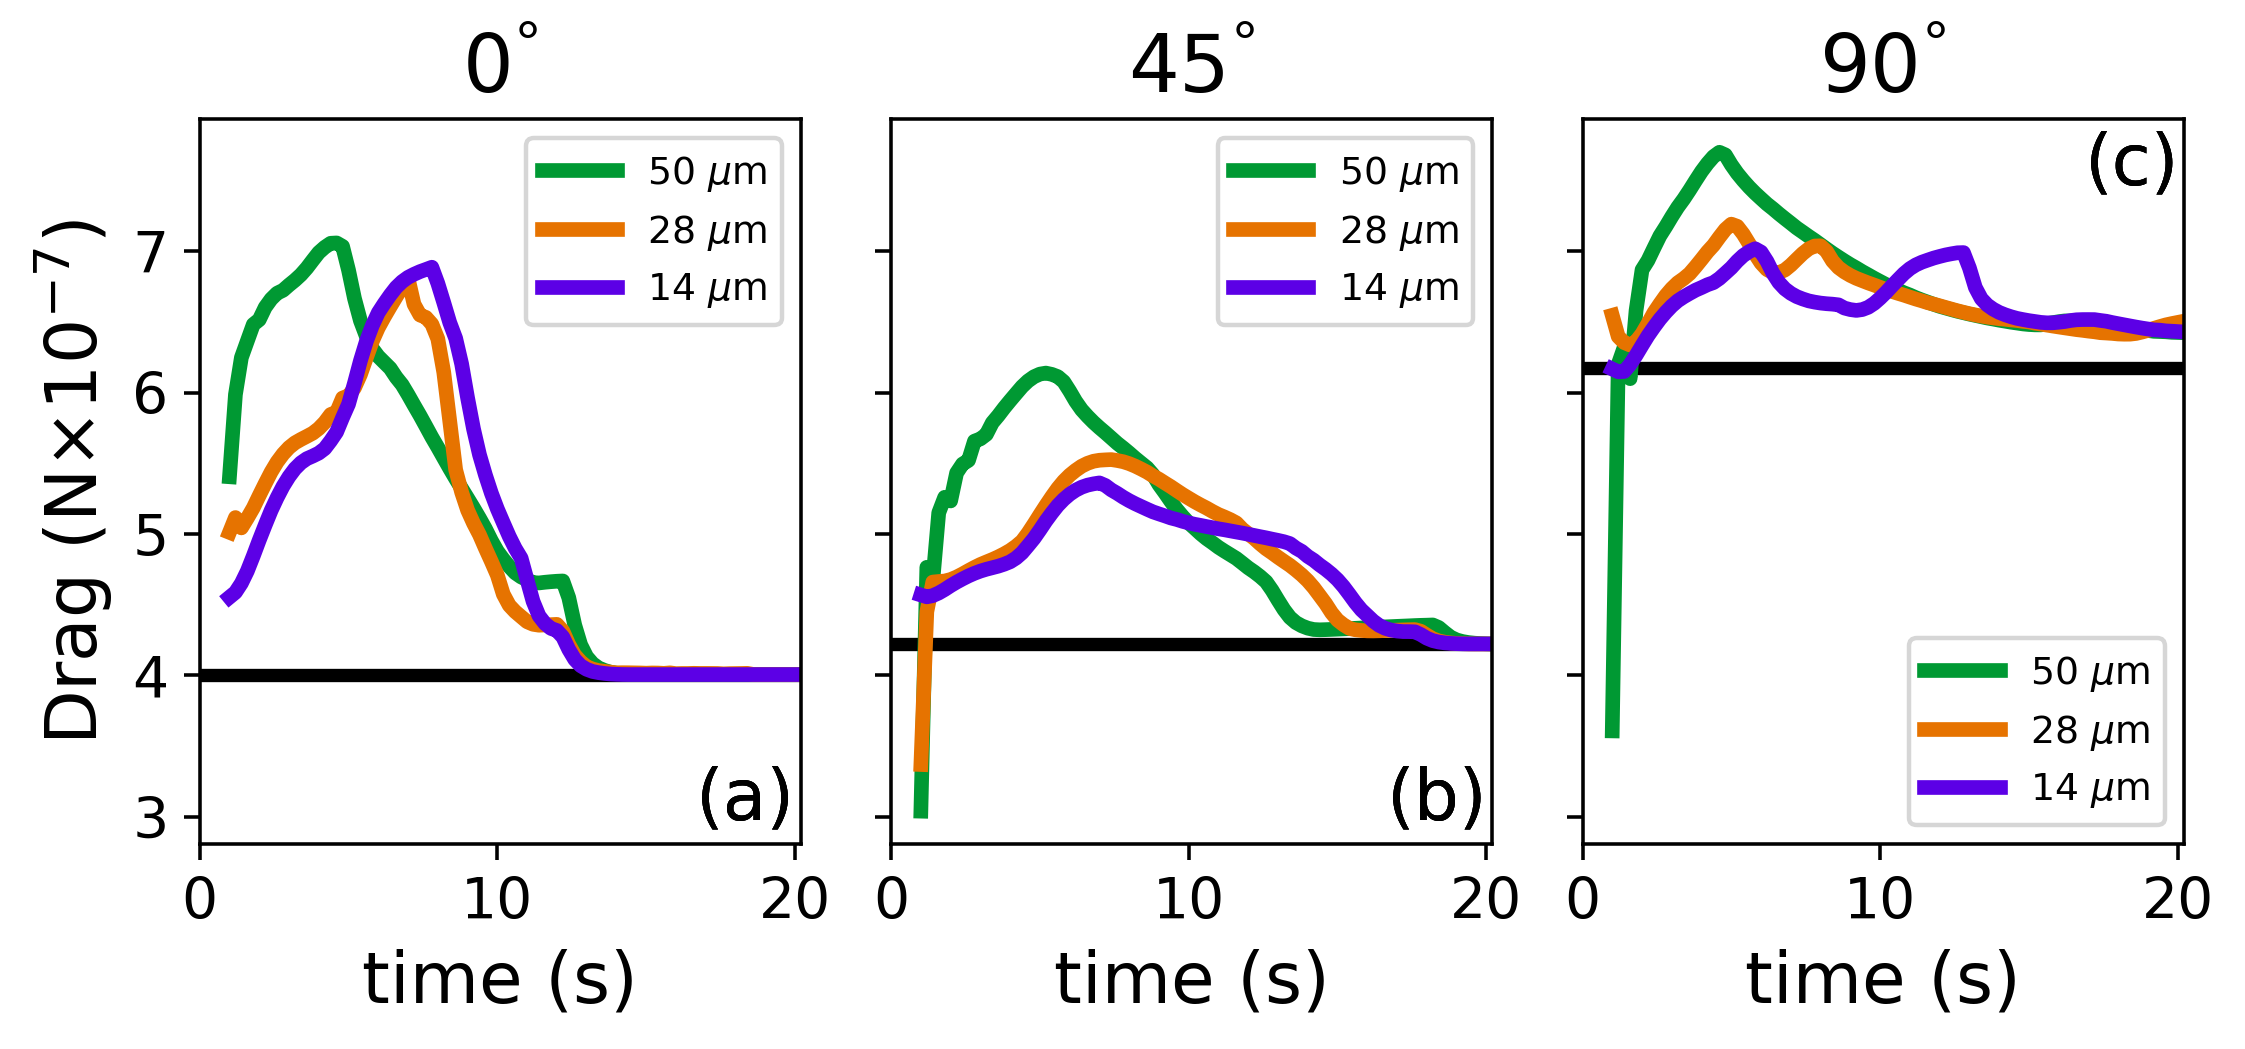

In [46]:
plot3x1DragcomparisonPlots(dragDataframes_parallelFlow, dragDataframes_angle45Flow, dragDataframes_perpendicularFlow, NOBIOFILM_drag_vals, bf_thickness_labels, drag_angle_labels, "drag_vs_angle")

In [12]:
# plot3x1DragcomparisonPlots(dragDataFrames_14microns, dragDataFrames_28microns, dragDataFrames_50microns, label_list=drag_angle_labels, title_list=bf_thickness_labels, filename="drag_vs_bfThickness")

In [42]:
def plot3x1AlphaComparisonPlots(df_group1, df_group2, df_group3, label_list, title_list, normalised, filename):
    '''
    same sort of method as the drag plots above but for the alpha (biofilm) plots.
    this method takes the argument "normalised" which is a boolean value which says whether we're doing the normalised alpha plots or not
    '''
    
    fig, axs = plt.subplots(1,3, dpi=320, sharey=True)
    fig.set_size_inches(8,3)
    
    labelSize=16
    titleSize=18
    
    if normalised:
        df_key = "alpha_normalised"
        #y_label = "$\\alpha / \\alpha_\max$"
        y_label = "normalised \n biomass volume"
        
    else:
        df_key = "alpha.biofilm"
        #y_label = "volume of $\\alpha$ (m$^3$ $\\times 10^{-11}$)"
        y_label = "biomass volume \n (m$^3$ $\\times 10^{-11}$)"
        
    
    df_group_list = [df_group1, df_group2, df_group3]
    letters = list(string.ascii_lowercase)[:len(df_group_list)] #letters used for labelling subplots
    i = 0 #index used to keep track of which subplot we're on
    
    for ax, df_group_and_key, title, letter in zip(axs.flat, df_group_list, title_list, letters):
        
        for df, label, line_colour in zip(df_group_and_key, label_list, thickness_colours):
            
            ax.plot(df["t"], df[df_key], label=label, lw=3.3, color=line_colour)
            
            ax.set_title(title, fontsize=titleSize)
            ax.set_ylabel(y_label, fontsize=labelSize)
            ax.set_xlabel("time (s)", fontsize=labelSize)
#             ax.text(0.015, 0.03, "("+letter+")", transform=ax.transAxes, fontsize=14)
            
            ax.tick_params(axis='both', which='major', labelsize=12.8)
            ax.yaxis.offsetText.set_visible(False) #removes the sci notation factor from the plots (double check it's the correct value in the axis label)
            
            handles, labels = ax.get_legend_handles_labels()
#             ax.legend(handles[::-1], labels[::-1], fontsize=8.5, loc="best", framealpha=0.6)
            ax.label_outer()
            
            if normalised: 
                
                ax.set_ylim(0., 1.)
                ax.legend(handles[::], labels[::], fontsize=8.5, loc="best", framealpha=0.6)
                
                if i > 0:
                    ax.text(0.83, 0.91, "("+letter+")", transform=ax.transAxes, fontsize=16)
                else:
                    ax.text(0.015, 0.03, "("+letter+")", transform=ax.transAxes, fontsize=16)
            
            else:
                
                ax.set_ylim(-0.05e-11, 1.5e-11)
                ax.legend(handles[::-1], labels[::-1], fontsize=8.5, loc="best", framealpha=0.6)
                ax.text(0.015, 0.03, "("+letter+")", transform=ax.transAxes, fontsize=16)
        
        i += 1
    
    plt.subplots_adjust(wspace=0.15)
    if normalised: plt.locator_params(axis='y', nbins=3)
    else: plt.locator_params(axis='y', nbins=5)
        
    plt.savefig("riblet_plots/"+filename+".pdf", bbox_inches="tight")
    plt.show()

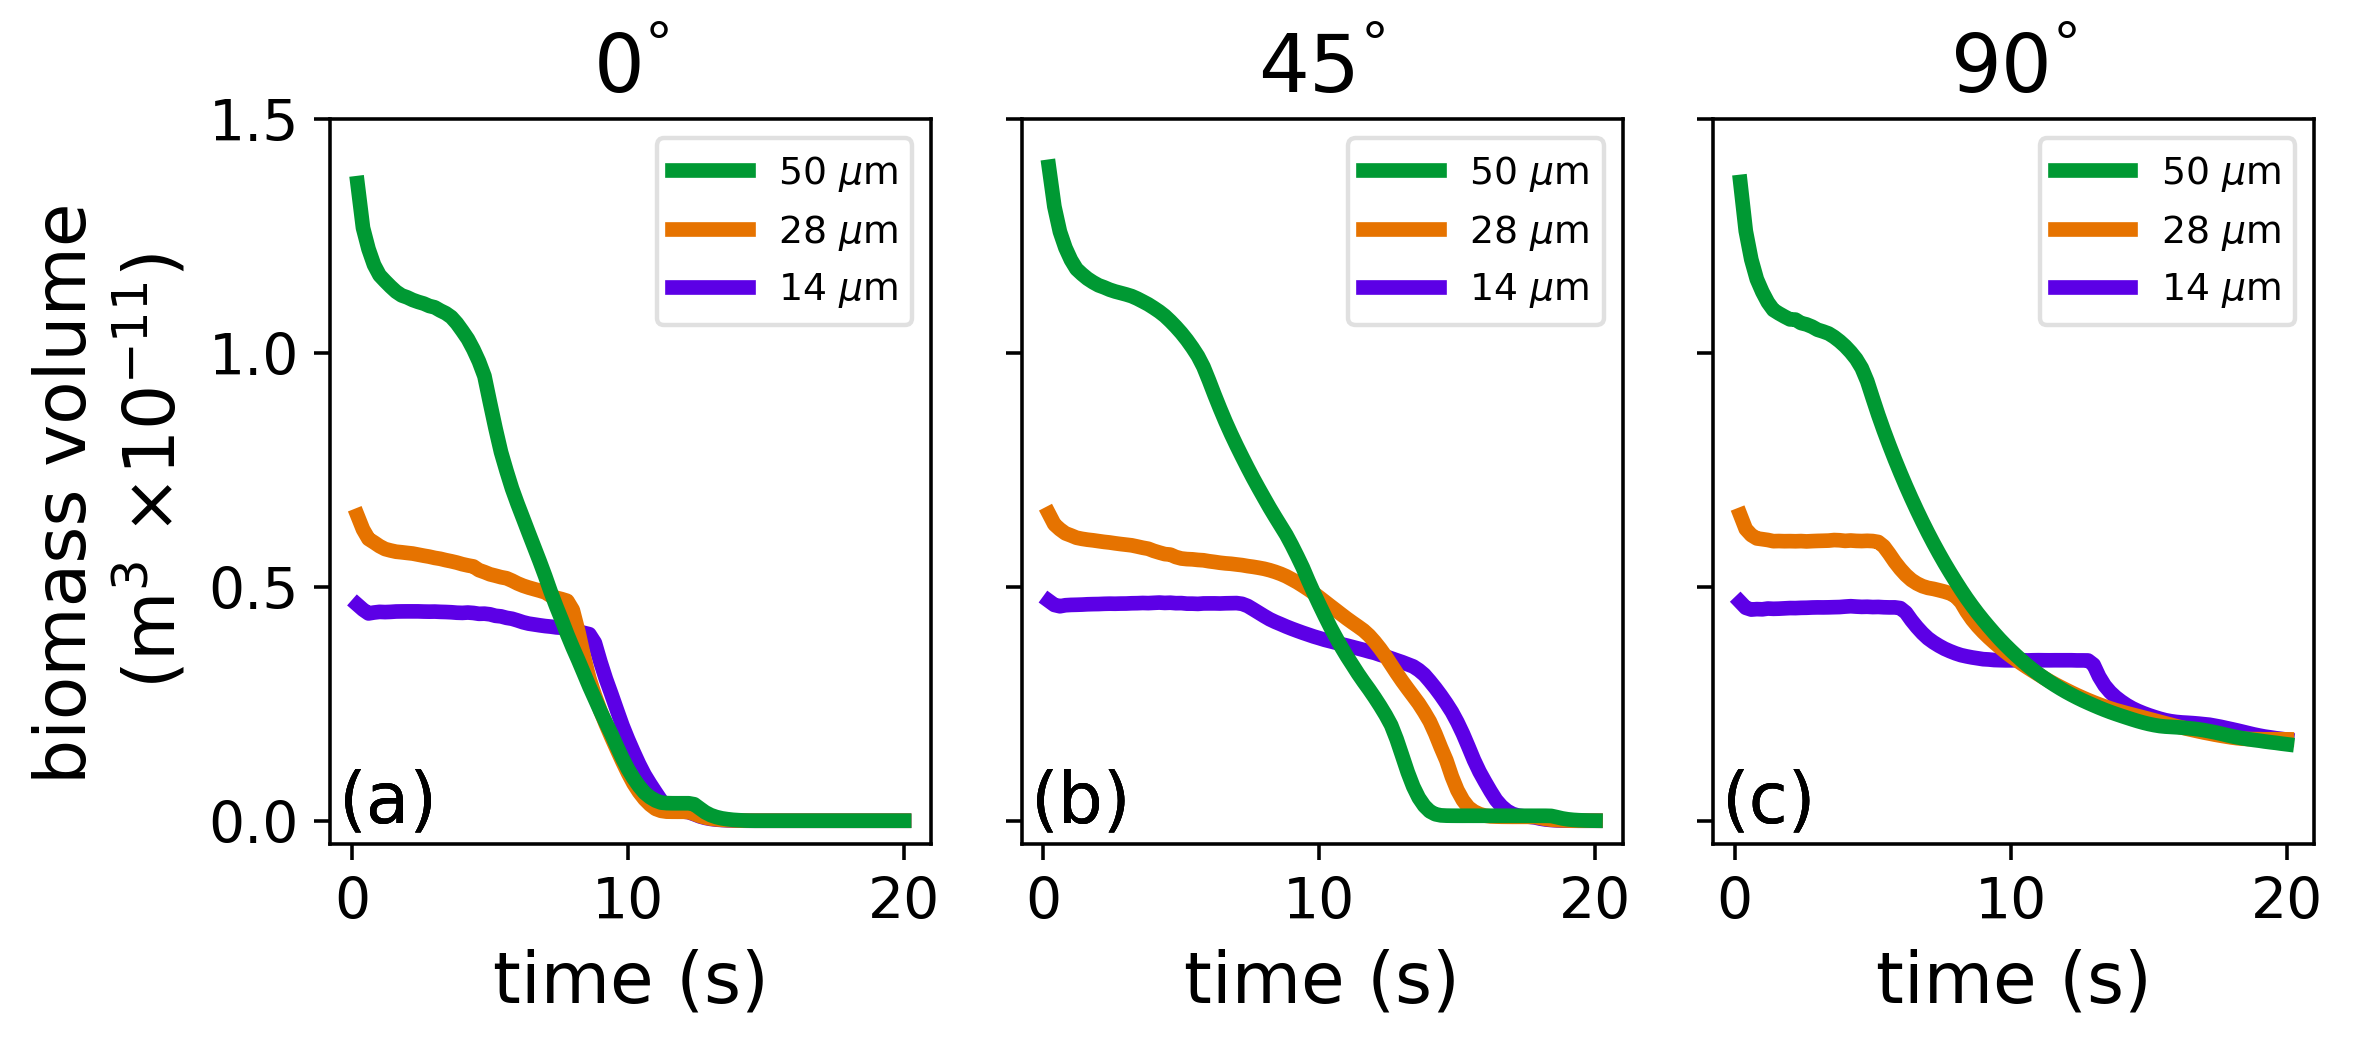

In [43]:
plot3x1AlphaComparisonPlots(alphaDataframes_parallelFlow, alphaDataframes_angle45Flow, alphaDataframes_perpendicularFlow, bf_thickness_labels, drag_angle_labels, 
                            normalised=False, filename="alpha_vs_angle")

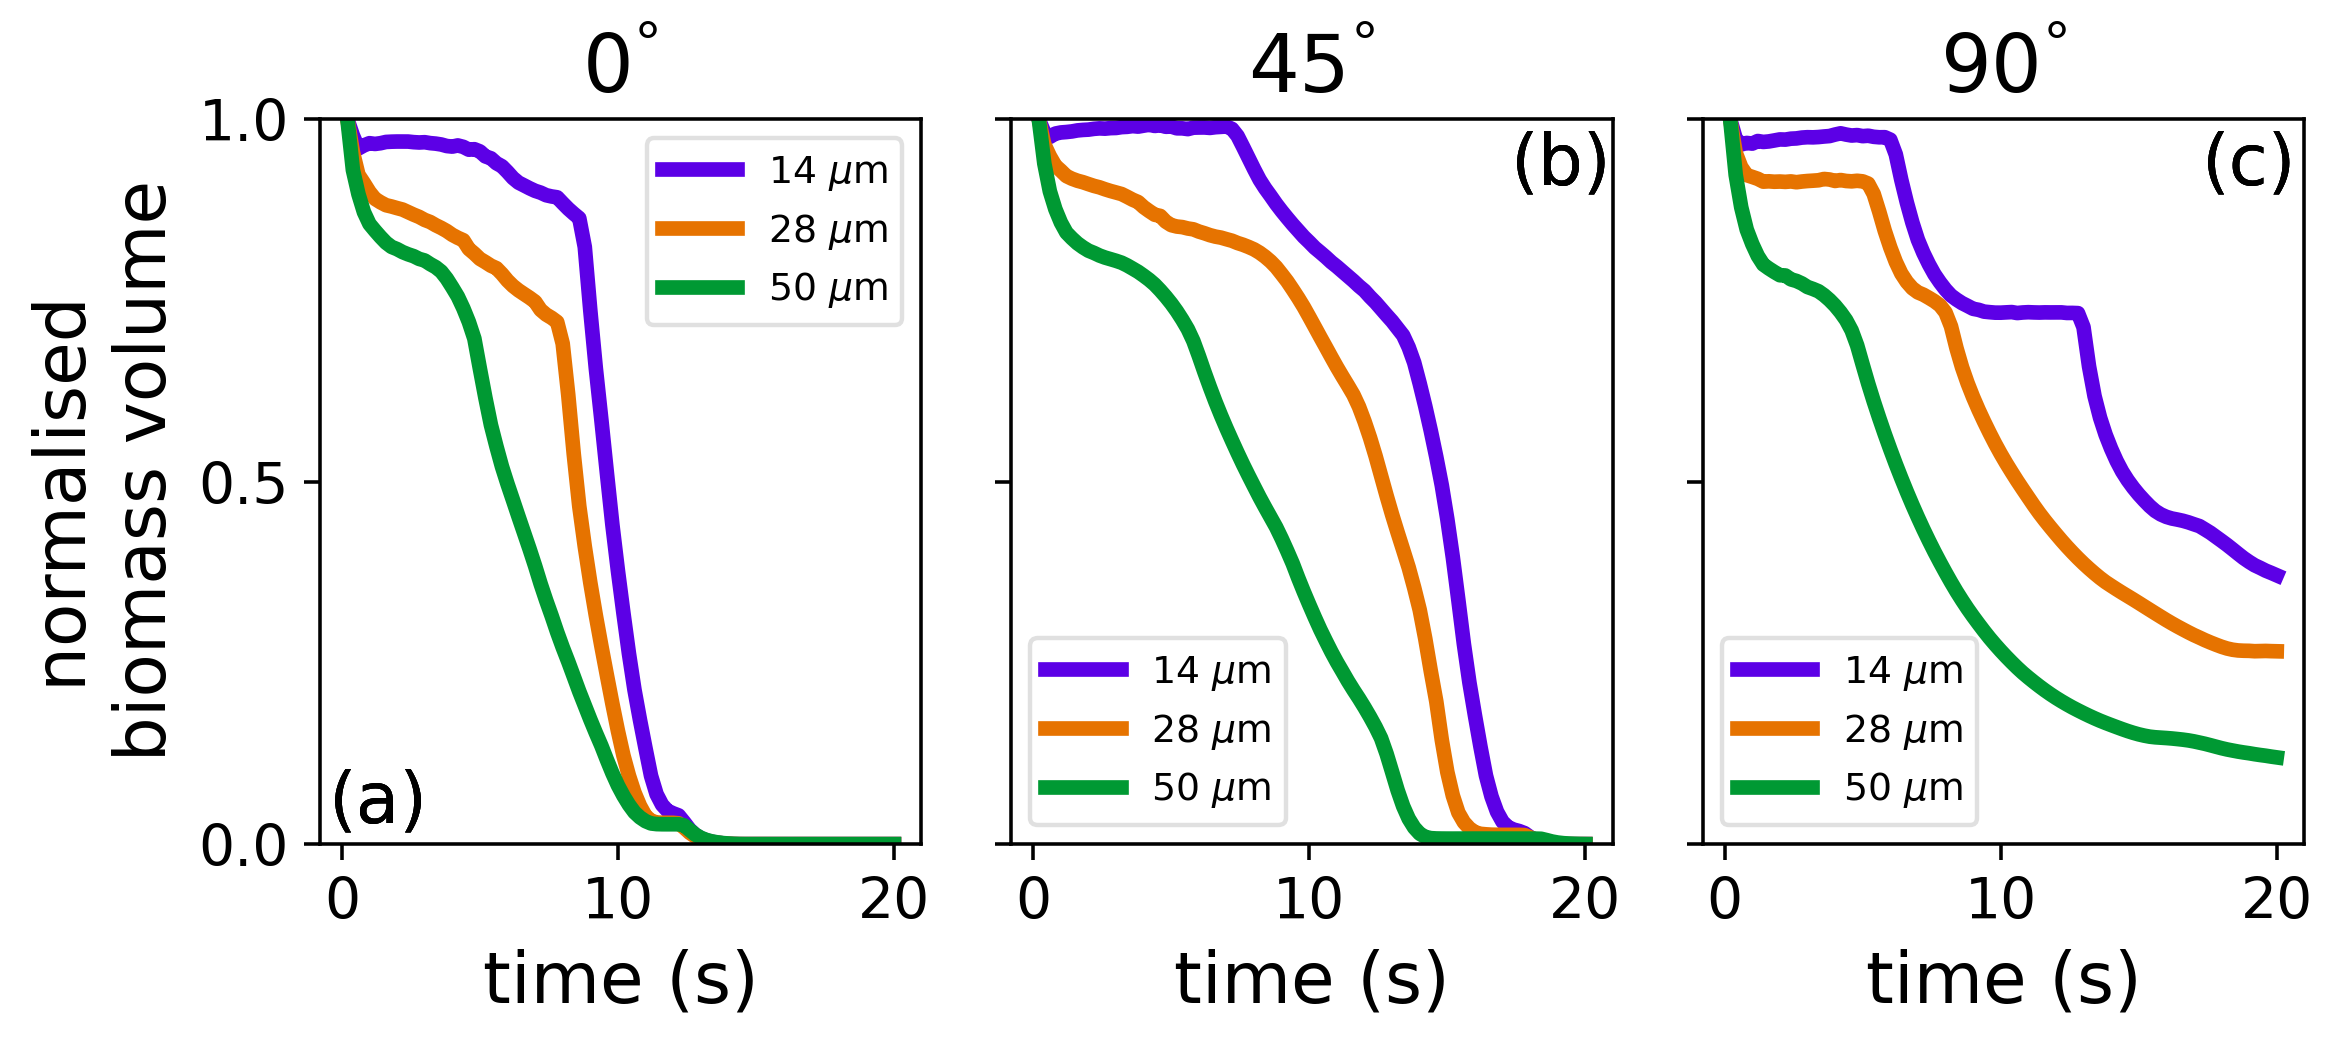

In [44]:
plot3x1AlphaComparisonPlots(alphaDataframes_parallelFlow, alphaDataframes_angle45Flow, alphaDataframes_perpendicularFlow, bf_thickness_labels, drag_angle_labels, 
                            normalised=True, filename="alpha_vs_angle_NORMALISED")

In [16]:
# plot3x1AlphaComparisonPlots(alphaDataFrames_14microns, alphaDataFrames_28microns, alphaDataFrames_50microns, label_list=drag_angle_labels, title_list=bf_thickness_labels, 
#                             normalised=False, filename="alpha_vs_thickness")

In [17]:
# plot3x1AlphaComparisonPlots(alphaDataFrames_14microns, alphaDataFrames_28microns, alphaDataFrames_50microns, label_list=drag_angle_labels, title_list=bf_thickness_labels, 
#                             normalised=True, filename="alpha_vs_thickness_NORMALISED")

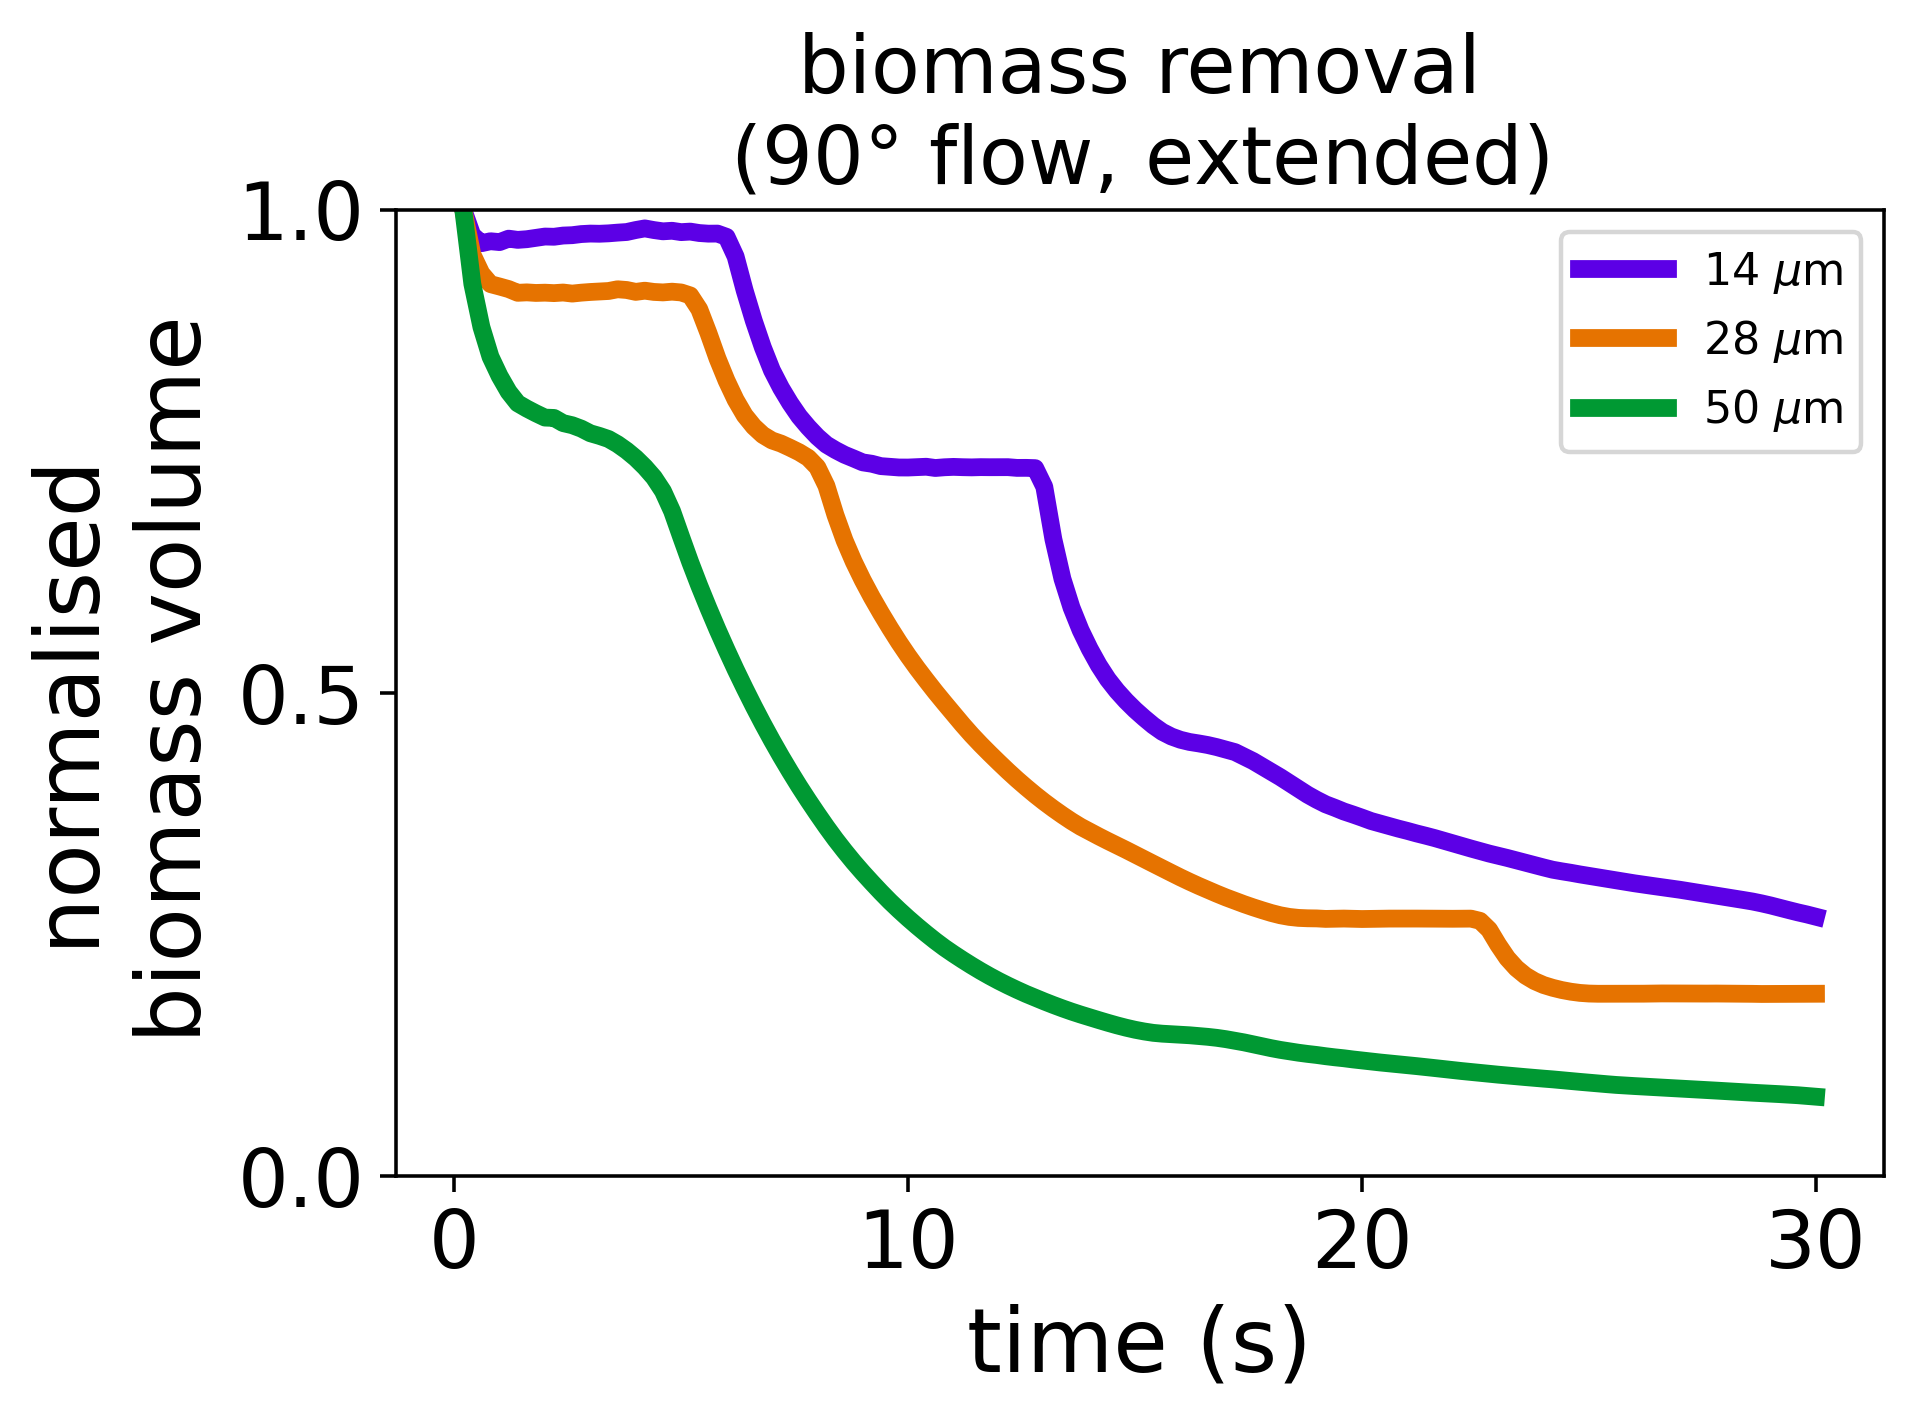

In [58]:
#plot the extended perpendicular flow simulations for alpha (normalised)
labelSize=20
titleSize=18
fig, ax = plt.subplots(dpi=320)
fig.set_size_inches(6,4)

for df, line_label, line_colour in zip(alphaDataframes_perpendicularFlow_EXTRA, bf_thickness_labels, thickness_colours):
    ax.plot(df['t'], df['alpha_normalised'], label=line_label, lw=4, c=line_colour)
    
ax.set_title("biomass removal\n($90\degree$ flow, extended)", fontsize=titleSize)
ax.set_ylabel("normalised \n biomass volume", fontsize=labelSize)
ax.set_xlabel("time (s)", fontsize=labelSize)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylim(0,1)
plt.legend()
plt.locator_params(axis='y', nbins=3)
plt.savefig("riblet_plots/alphaNormalised_perpendicular_EXTRA.pdf", bbox_inches='tight')
plt.show()

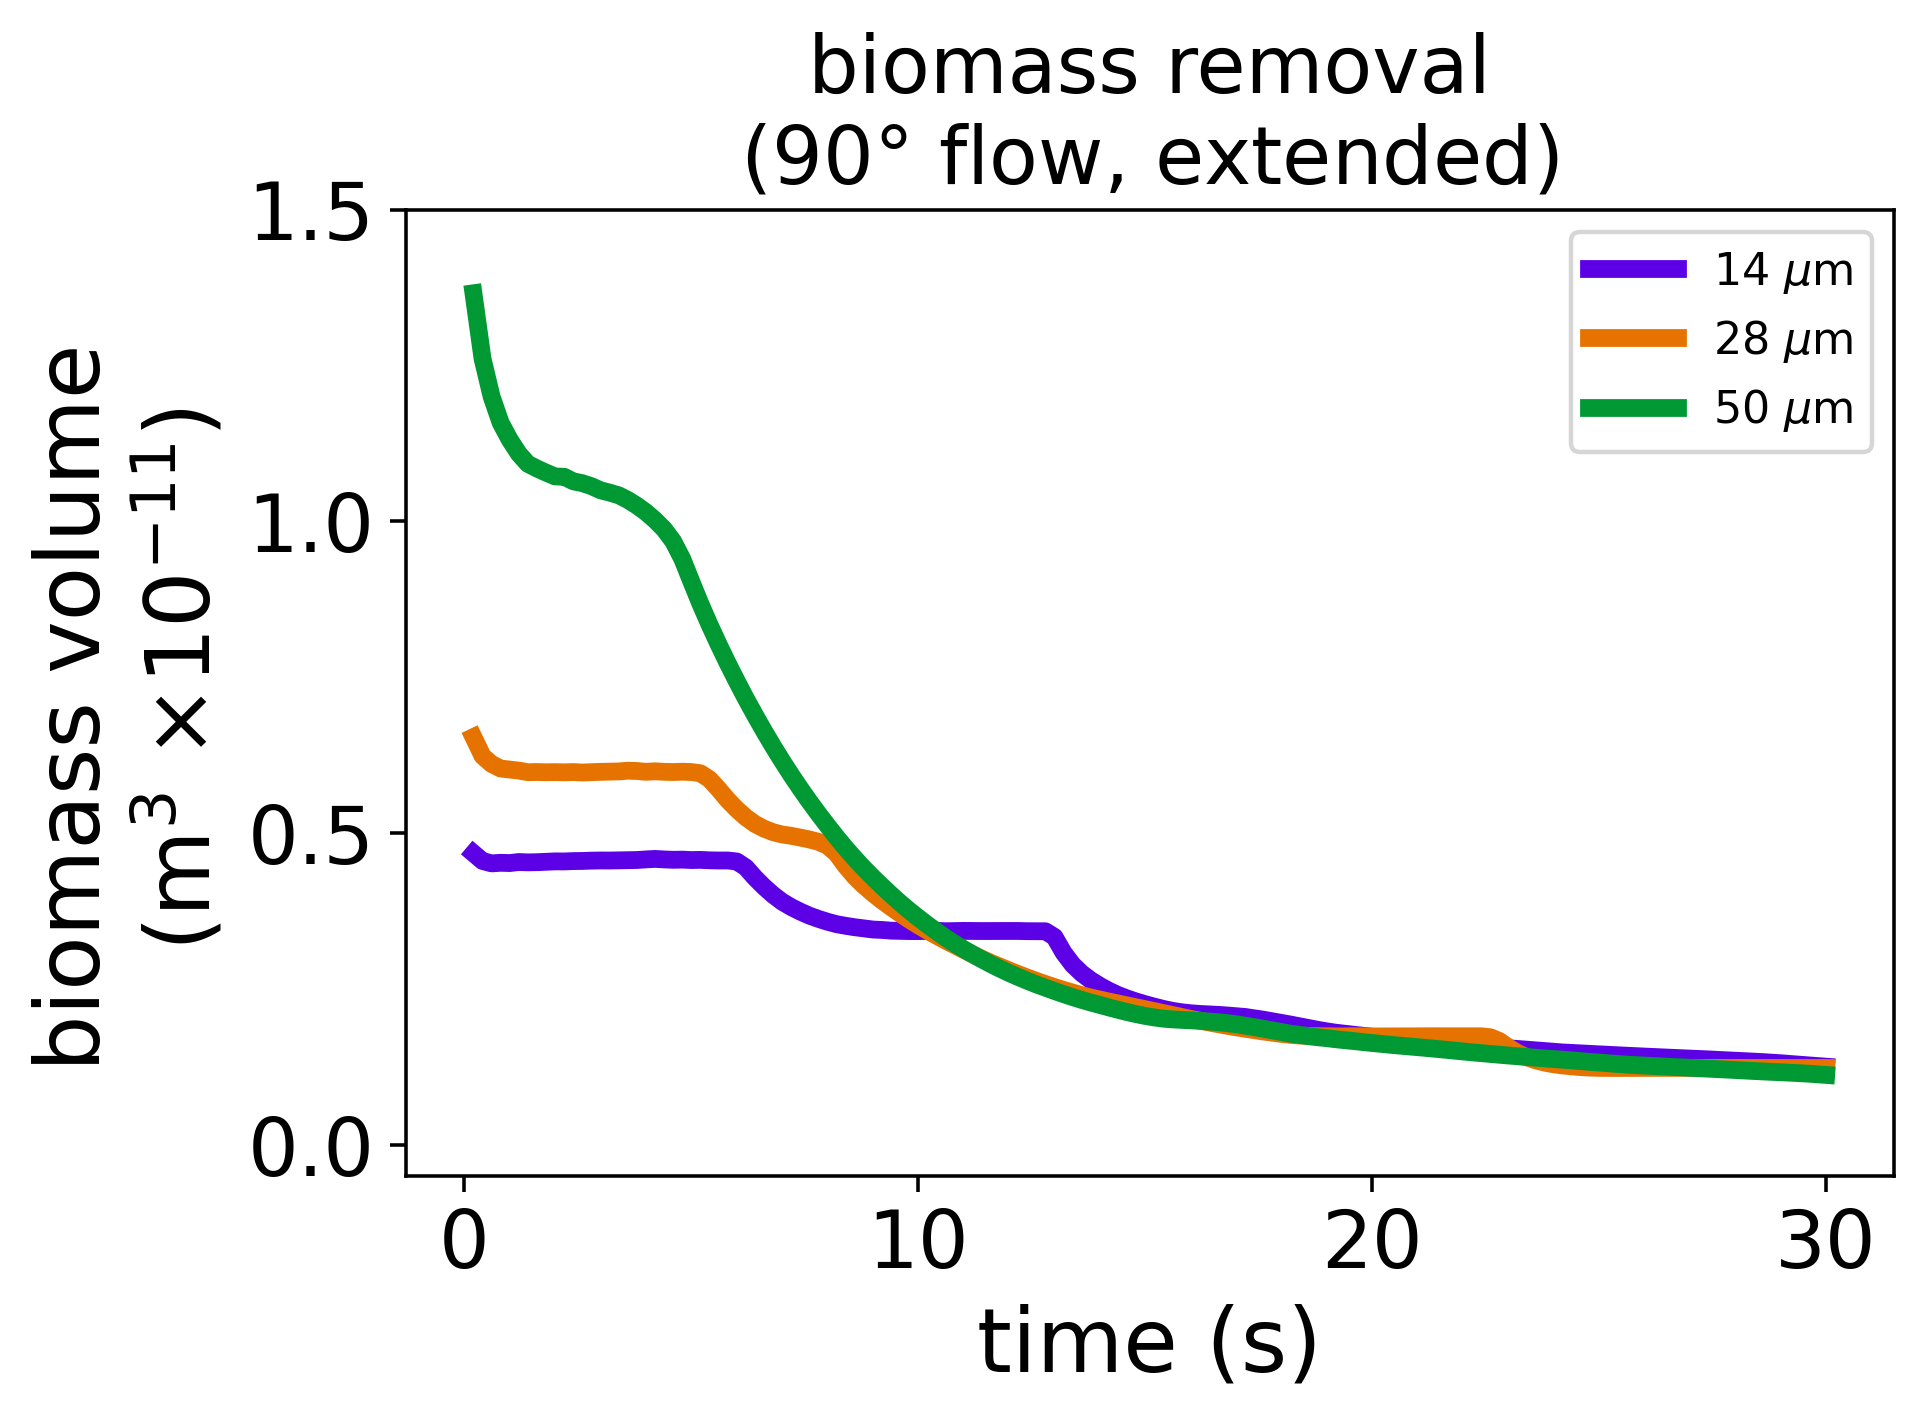

In [56]:
#plot the extended perpendicular flow simulations for alpha
#plot the extended perpendicular flow simulations for alpha (normalised)
labelSize=20
titleSize=18
fig, ax = plt.subplots(dpi=320)
fig.set_size_inches(6,4)

for df, line_label, line_colour in zip(alphaDataframes_perpendicularFlow_EXTRA, bf_thickness_labels, thickness_colours):
    ax.plot(df['t'], df['alpha.biofilm'], label=line_label, lw=4, c=line_colour)
    
ax.set_title("biomass removal\n($90\degree$ flow, extended)", fontsize=titleSize)
ax.set_ylabel("biomass volume \n (m$^3$ $\\times 10^{-11}$)", fontsize=labelSize)
ax.set_xlabel("time (s)", fontsize=labelSize)
ax.tick_params(axis='both', which='major', labelsize=18)
#ax.set_ylim(0,1)
ax.yaxis.offsetText.set_visible(False) #removes the sci notation factor from the plots (double check it's the correct value in the axis label)

plt.locator_params(axis='y', nbins=6)



    
#ax.set_title("$90\degree$", fontsize=titleSize)
#ax.set_xlabel("time (s)", fontsize=labelSize)

ax.set_ylim(-0.05e-11, 1.5e-11)
plt.legend()

plt.savefig("riblet_plots/alpha_perpendicular_EXTRA.pdf", bbox_inches='tight')
plt.show()

In [57]:
#times chosen as features in the plot
times_of_interest = np.array([9.6, 12., 13.2, 15])

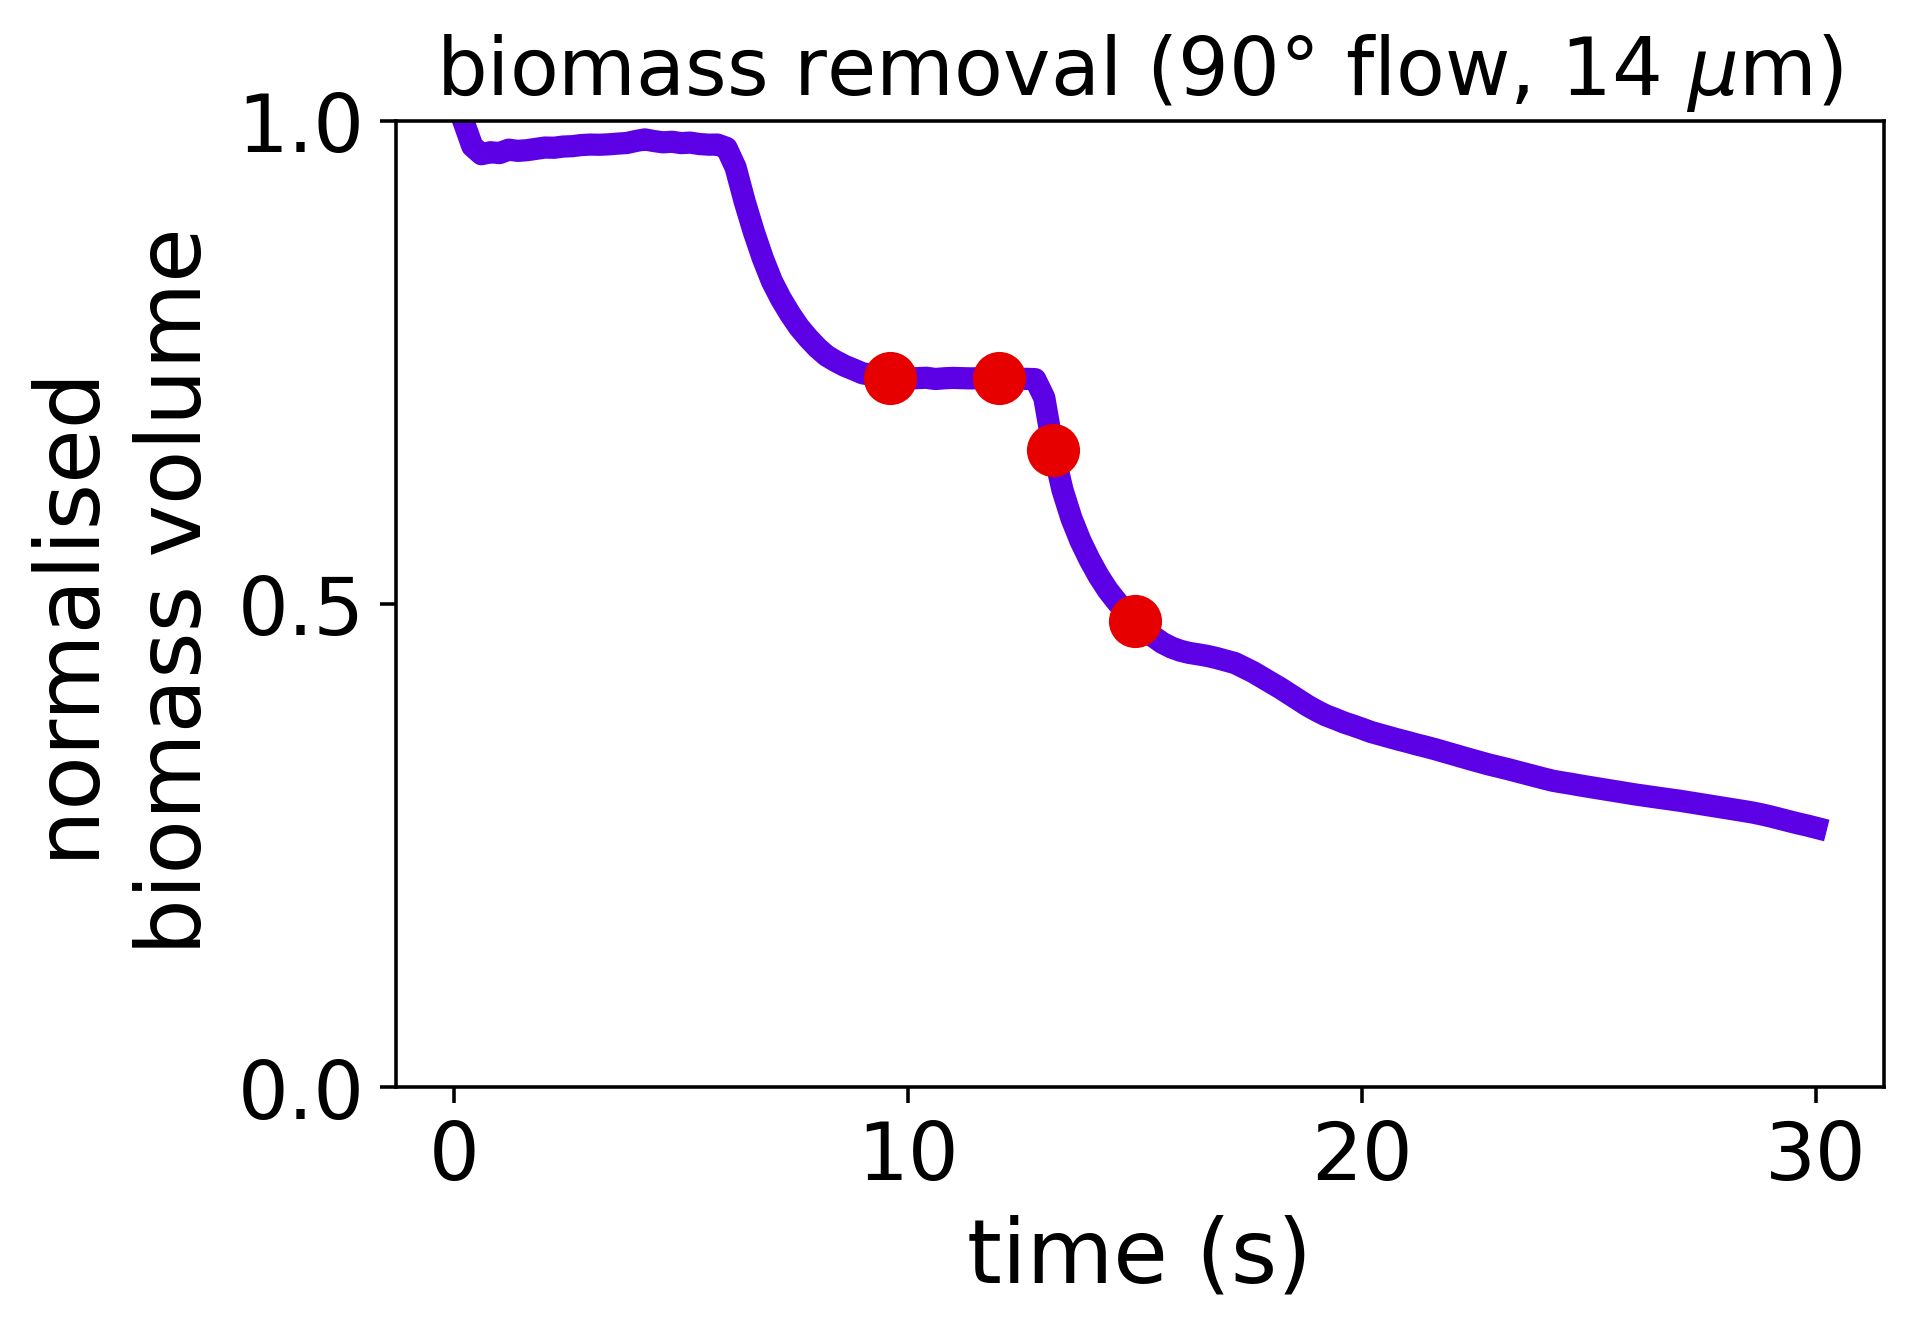

In [64]:
#plot the extended perpendicular flow simulations for alpha
labelSize=20
titleSize=18
fig, ax = plt.subplots(dpi=320)
fig.set_size_inches(6,4)


ax.plot(perpendicularFlow_14microns_alpha_EXTRA['t'], perpendicularFlow_14microns_alpha_EXTRA['alpha_normalised'], label=line_label, lw=5, zorder=1, c=thickness_colours[0])

indices_of_interest = np.isin(perpendicularFlow_14microns_alpha_EXTRA['t'], times_of_interest)

ax.scatter(times_of_interest, perpendicularFlow_14microns_alpha_EXTRA['alpha_normalised'][indices_of_interest], s=120, zorder=2, c='#e60000')
    
ax.set_title("biomass removal ($90\degree$ flow, 14 $\mu$m)", fontsize=titleSize)
ax.set_ylabel("normalised \n biomass volume", fontsize=labelSize)
ax.set_xlabel("time (s)", fontsize=labelSize)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylim(0,1)
plt.locator_params(axis='y', nbins=3)
plt.savefig("riblet_plots/alphaNormalised_perpendicular_EXTRA_14microns.pdf", bbox_inches='tight')
plt.show()

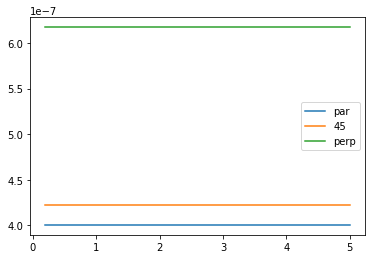

In [22]:
plt.plot(parallelFlow_NOBIOFILM_drag['t'], parallelFlow_NOBIOFILM_drag['F_z'], label='par')
plt.plot(angle45Flow_NOBIOFILM_drag['t'], angle45Flow_NOBIOFILM_drag['F_total'], label='45')
plt.plot(perpendicularFlow_NOBIOFILM_drag['t'], perpendicularFlow_NOBIOFILM_drag['F_x'], label='perp')
plt.legend()
plt.show()